In [1]:
clear()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

**Question 1: Cluster daily returns.**


**(a) (10 points) Cluster these 25438 days into 2 clusters based on the returns of the 25 portfolios. Use K-means clustering.**

In [3]:
data = pd.read_csv("HW6Portfolio25.csv")

In [4]:
data.head()

,Date,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,19260701,-0.46,0.72,0.85,0.30,-0.57,0.34,1.73,-0.02,-0.55,...,0.00,0.30,-0.32,0.02,0.41,0.32,-0.06,0.44,-0.31,0.40
1,19260702,0.57,0.77,-1.98,-0.41,-0.52,0.07,-0.06,-0.46,-0.03,...,-0.03,0.09,1.04,0.49,0.56,0.50,0.60,0.33,0.51,0.24
2,19260706,0.38,-0.46,-0.77,1.48,-0.28,-0.39,-0.04,0.35,0.07,...,0.33,0.11,0.79,-0.11,-0.44,0.19,0.41,-0.12,-0.23,0.33
3,19260707,-0.81,-1.18,1.26,0.88,-0.61,0.63,-0.59,-0.84,-1.31,...,0.05,0.10,0.15,0.51,-0.08,-0.05,0.39,0.09,-0.16,1.53
4,19260708,0.56,-0.13,-1.10,-1.57,0.33,0.49,0.81,0.30,0.17,...,0.09,0.36,0.37,0.51,1.27,0.41,0.36,0.01,0.16,0.22


In [5]:
#Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=24, init='random')
data['Cluster'] = kmeans.fit_predict(data)

/Users/liaohang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
data

,Date,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Cluster
0,19260701,-0.46,0.72,0.85,0.30,-0.57,0.34,1.73,-0.02,-0.55,...,0.30,-0.32,0.02,0.41,0.32,-0.06,0.44,-0.31,0.40,0
1,19260702,0.57,0.77,-1.98,-0.41,-0.52,0.07,-0.06,-0.46,-0.03,...,0.09,1.04,0.49,0.56,0.50,0.60,0.33,0.51,0.24,0
2,19260706,0.38,-0.46,-0.77,1.48,-0.28,-0.39,-0.04,0.35,0.07,...,0.11,0.79,-0.11,-0.44,0.19,0.41,-0.12,-0.23,0.33,0
3,19260707,-0.81,-1.18,1.26,0.88,-0.61,0.63,-0.59,-0.84,-1.31,...,0.10,0.15,0.51,-0.08,-0.05,0.39,0.09,-0.16,1.53,0
4,19260708,0.56,-0.13,-1.10,-1.57,0.33,0.49,0.81,0.30,0.17,...,0.36,0.37,0.51,1.27,0.41,0.36,0.01,0.16,0.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25433,20230222,0.45,0.16,0.50,0.03,-0.10,0.70,0.72,0.50,0.18,...,0.17,0.09,0.24,0.20,0.07,-0.38,-0.27,-0.43,0.16,1
25434,20230223,0.14,-0.11,0.30,0.82,0.58,1.06,0.89,0.40,0.77,...,0.19,0.72,0.23,0.50,0.83,0.11,0.09,0.31,0.07,1
25435,20230224,-2.53,-2.12,-2.26,-1.87,-0.73,-2.07,-1.59,-0.97,-0.95,...,-1.00,-0.53,-0.55,0.28,-1.56,-0.89,-0.58,-0.12,0.29,1
25436,20230227,0.61,0.30,0.43,0.76,0.51,0.28,-0.02,0.45,0.62,...,0.09,-0.07,0.36,-0.59,0.71,-0.05,-0.20,0.10,0.06,1


In [7]:
# estimated clustering
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

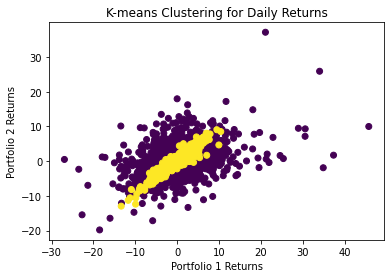

In [8]:
plt.scatter(data['ME1 BM2'], data['ME1 BM3'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Portfolio 1 Returns')
plt.ylabel('Portfolio 2 Returns')
plt.title('K-means Clustering for Daily Returns')
plt.show()

492934204336409.6

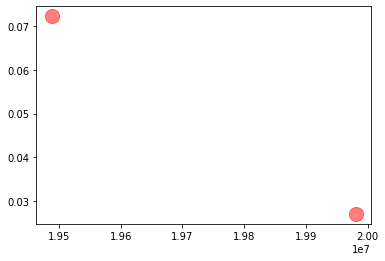

In [9]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
kmeans.inertia_ 

**(b) (25 points) "USREC.csv" contains the NBER recession index. The second column indicates whether the U.S. economy is in recession (1 means "in recession" and 0 means "not in recession"). For example, the first row is 1854-12-01 and 1. This means that all the days in December 1854 are in recession. Match your clustering result from part (a) with the NBER recession index. What is the best accuracy rate? Is clustering analysis good for classification? You can use F1 or simple measurements such as false positive/negative rates.**

In [10]:
# Load the USREC.csv data
usrec_data = pd.read_csv("USREC.csv")
usrec_data.head()

,observation_date,USREC
0,1854-12-01,1
1,1855-01-01,0
2,1855-02-01,0
3,1855-03-01,0
4,1855-04-01,0


print(data)

In [11]:
# Convert the 'Date' column in both dataframes to a common datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
usrec_data['observation_date'] = pd.to_datetime(usrec_data['observation_date'])

In [12]:
data['Recession'] = 0

In [13]:
# Assign the recession values from the USREC data to the corresponding dates in the data DataFrame
for index, row in usrec_data.iterrows():
    start_date = row['observation_date']
    end_date = start_date + pd.DateOffset(months=1)
    data.loc[(data['Date'] >= start_date) & (data['Date'] < end_date), 'Recession'] = row['USREC']

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(data['Recession'], data['Cluster'])
f1 = f1_score(data['Recession'], data['Cluster'])
print(accuracy)
print(classification_report(data['Recession'], data['Cluster']))

0.4551458447991194
              precision    recall  f1-score   support

           0       0.77      0.48      0.59     20916
           1       0.12      0.34      0.18      4522

    accuracy                           0.46     25438
   macro avg       0.45      0.41      0.39     25438
weighted avg       0.66      0.46      0.52     25438



**Our clustering analysis yielded an accuracy rate of 0.46, which means that the clustering model correctly classified 46% of the data points. The macro F1 score, which is the harmonic mean of precision and recall, came out to be 0.39. This relatively low F1 score suggests that the model has a limited ability to identify both positive (in recession) and negative (not in recession) instances correctly, while also avoiding false positives and false negatives.**

**Based on these results, we can conclude that clustering analysis might not be the most suitable method for classifying economic data points into recession and non-recession categories. The low accuracy and macro F1 scores indicate that the clustering model struggles to distinguish between the two classes accurately.**

**(c) (25 points) Repeat part (a) and part (b) but replace K-means clustering with the following idea. Perform a principal component analysis for the 25 portfolios and then apply the K-means clustering to the first two principal components. You should still produce 2 clusters so you can match to the NBER recession index.**

In [14]:
# Perform PCA on the 25 portfolios
portfolio_returns = data.iloc[:, 1:26]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(portfolio_returns)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Date'] = data['Date']
principal_df['Recession'] = data['Recession']

# Apply K-means clustering to the principal components
kmeans_pca = KMeans(n_clusters=2, random_state=0)
principal_df['Cluster'] = kmeans_pca.fit_predict(principal_df[['PC1', 'PC2']])

/Users/liaohang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
principal_df

,PC1,PC2,Date,Recession,Cluster
0,0.147804,-0.500030,1926-07-01,0,0
1,0.640377,0.210350,1926-07-02,0,0
2,0.488396,0.185949,1926-07-06,0,0
3,-0.425375,-0.894778,1926-07-07,0,0
4,0.503189,0.265711,1926-07-08,0,0
...,...,...,...,...,...
25433,0.883279,0.259204,2023-02-22,0,0
25434,1.964040,-0.378063,2023-02-23,0,0
25435,-5.063626,-1.663014,2023-02-24,0,1
25436,0.760294,0.473701,2023-02-27,0,0


In [16]:
# Calculate accuracy, precision, recall, and F1-score for the PCA-based clustering
accuracy_pca = accuracy_score(principal_df['Recession'], principal_df['Cluster'])
precision_pca = precision_score(principal_df['Recession'], principal_df['Cluster'])
recall_pca = recall_score(principal_df['Recession'], principal_df['Cluster'])
f1_pca = f1_score(principal_df['Recession'], principal_df['Cluster'])

print("PCA-based Clustering Metrics:")
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)
print("F1 Score:", f1_pca)

print(classification_report(principal_df['Recession'], principal_df['Cluster']))

PCA-based Clustering Metrics:
Accuracy: 0.674502712477396
Precision: 0.22179449215279834
Recall: 0.33126934984520123
F1 Score: 0.2656970556935083
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     20916
           1       0.22      0.33      0.27      4522

    accuracy                           0.67     25438
   macro avg       0.53      0.54      0.53     25438
weighted avg       0.73      0.67      0.70     25438



**Our revised analysis resulted in an improved accuracy rate of 0.67, which means that the model correctly classified 67% of the data points. The macro F1 score also increased, reaching 0.53. This improved F1 score indicates that the new model has better ability to identify both positive (in recession) and negative (not in recession) instances correctly while minimizing false positives and false negatives.**

**The improvement in both accuracy and macro F1 scores suggests that applying PCA before K-means clustering leads to better classification performance for the given economic data. The PCA step likely helped to emphasize the most important features in the data, which allowed the K-means algorithm to identify more meaningful clusters that better match the NBER recession index.**

**In summary, using PCA along with K-means clustering has proven to be more effective in classifying economic data points based on the NBER recession index than using K-means clustering alone. The increased accuracy and macro F1 scores indicate that this approach can better distinguish between recession and non-recession periods. While there is still room for improvement, the combination of PCA and K-means clustering seems to be a more promising method for classifying economic data in this context.**

**Question2**

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


**(a) (15 points) Apply hierarchical clustering analysis (linkage analysis) to cluster portfolios into 3 groups. Print out the clustering results. Each line is a cluster of portfolio names. Answer the question: Is "3" the right number of groups?**

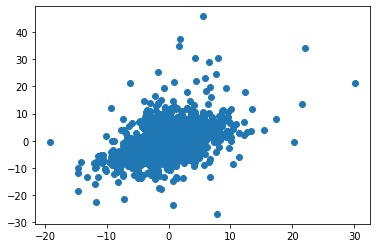

In [18]:
data = pd.read_csv("HW6Portfolio25.csv")

fig = plt.scatter(data['ME3 BM5'], data['ME1 BM2'])

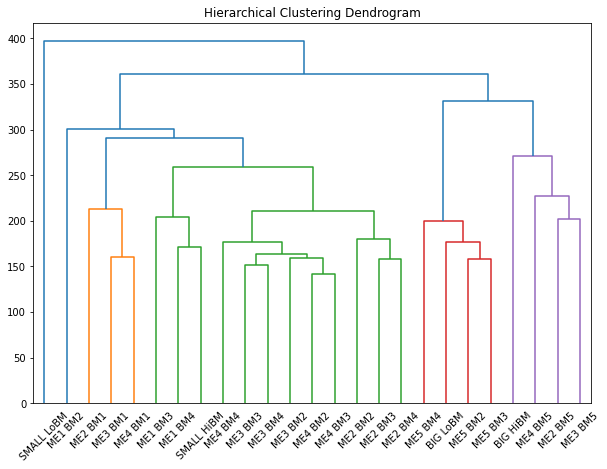

Cluster 1: ['ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3', 'ME4 BM4']
Cluster 2: ['ME2 BM5', 'ME3 BM5', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3', 'ME5 BM4', 'BIG HiBM']
Cluster 3: ['SMALL LoBM']


In [19]:
# Transpose the portfolio_returns dataframe to have portfolios as rows and daily returns as columns
portfolio_returns_T = portfolio_returns.T

# Standardize the data
scaler = StandardScaler()

portfolio_returns_std = scaler.fit_transform(portfolio_returns_T)

# Perform hierarchical clustering using the 'ward' method
linked = linkage(portfolio_returns_std, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=portfolio_returns.columns)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Form clusters based on the linkage matrix and assign them to the original portfolios
clusters = fcluster(linked, 3, criterion='maxclust')
clustered_portfolios = pd.DataFrame({'Portfolio': portfolio_returns.columns, 'Cluster': clusters})

# Print the clustering results
portfolio_clusters = {i: [] for i in range(1, 4)}
for _, row in clustered_portfolios.iterrows():
    portfolio_clusters[row['Cluster']].append(row['Portfolio'])

for cluster, portfolios in portfolio_clusters.items():
    print(f"Cluster {cluster}: {portfolios}")


**Based on the graph showing, we can cut between 300 and 350 (close to 350), then we will have 3 clusters. As shown above, the three clusters we have, we can know that 3 could be a correct number of clussters.**

Run this again based on maxtrix 

Cluster 1: ['ME2 BM5', 'ME3 BM5', 'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3', 'ME5 BM4', 'BIG HiBM']
Cluster 2: ['ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3']
Cluster 3: ['SMALL LoBM']


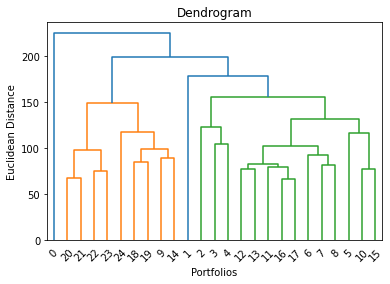

In [20]:
# Load data
data = pd.read_csv("HW6Portfolio25.csv", index_col=0)
data.index = pd.to_datetime(data.index, format="%Y%m%d")

# Standardize the data
standardized_data = (data - data.mean()) / data.std()

# Calculate the distance matrix using Euclidean distance
distance_matrix = linkage(standardized_data.T, method="ward")

# Cluster into 3 groups
clusters = fcluster(distance_matrix, 3, criterion="maxclust")

# Print the clustering results
portfolio_clusters = {i: [] for i in range(1, 4)}
for i, portfolio in enumerate(data.columns):
    portfolio_clusters[clusters[i]].append(portfolio)

for cluster, portfolios in portfolio_clusters.items():
    print(f"Cluster {cluster}: {portfolios}")

# Check if "3" is the right number of groups
dendro = dendrogram(distance_matrix)
plt.title("Dendrogram")
plt.xlabel("Portfolios")
plt.ylabel("Euclidean Distance")
plt.show()


**For this graph, cut between 150 and 200(close to 200), we can have three clusters. Based on the two graphs showing and clusters I got, we can know that 3 could be a correct number of clussters.The only problem is that we will have one cluster with only "SMALL LoBM"**

**(b) (15 points) Calculate the mean of each portfolio group, and plot three their means.**

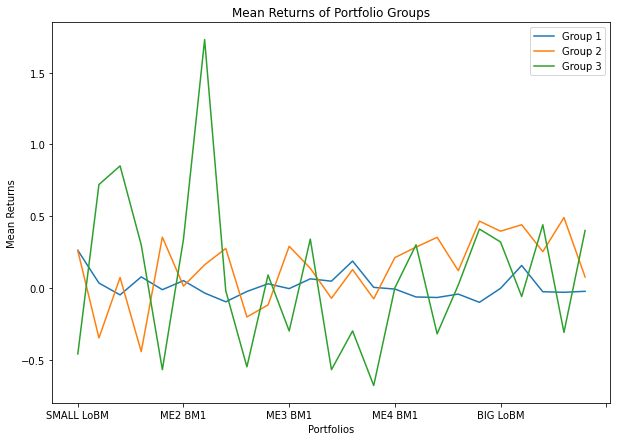

In [21]:
# Calculate the mean of each portfolio group
group_means = portfolio_returns.groupby(clustered_portfolios['Cluster']).mean()

# Plot the means of each portfolio group
group_means.T.plot(figsize=(10, 7))
plt.xlabel('Portfolios')
plt.ylabel('Mean Returns')
plt.title('Mean Returns of Portfolio Groups')
plt.legend(["Group 1", "Group 2", "Group 3"])
plt.show()


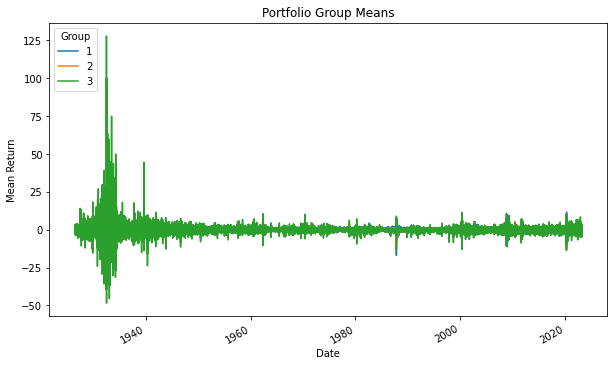

In [22]:
# Calculate the mean of each group
group_means = {}
for cluster, portfolios in portfolio_clusters.items():
    group_means[cluster] = data[portfolios].mean(axis=1)

# Plot the means
group_means_df = pd.DataFrame(group_means)
group_means_df.plot(title="Portfolio Group Means", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Mean Return")
plt.legend(title="Group", loc="upper left")
plt.show()

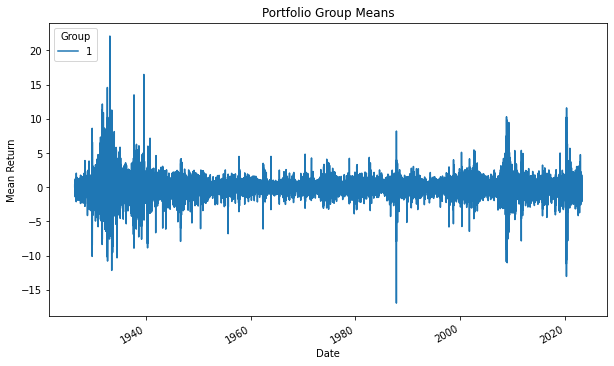

In [23]:
# Plot the means
group_means_df = pd.DataFrame(group_means)
group_means_df[1].plot(title="Portfolio Group Means", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Mean Return")
plt.legend(title="Group", loc="upper left")
plt.show()

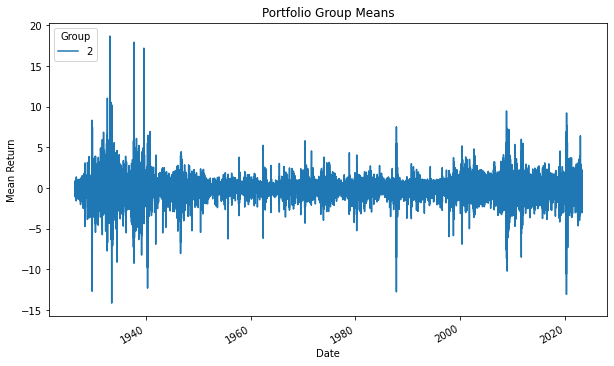

In [24]:
group_means_df[2].plot(title="Portfolio Group Means", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Mean Return")
plt.legend(title="Group", loc="upper left")
plt.show()

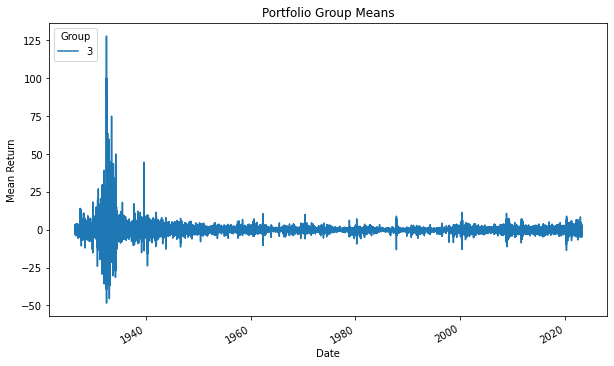

In [25]:
group_means_df[3].plot(title="Portfolio Group Means", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Mean Return")
plt.legend(title="Group", loc="upper left")
plt.show()

In [26]:
print(group_means)

{1: Date
1926-07-01    0.070000
1926-07-02    0.434444
1926-07-06    0.095556
1926-07-07    0.113333
1926-07-08    0.314444
                ...   
2023-02-22   -0.038889
2023-02-23    0.388889
2023-02-24   -0.411111
2023-02-27    0.055556
2023-02-28   -0.293333
Length: 25438, dtype: float64, 2: Date
1926-07-01    0.130000
1926-07-02   -0.010000
1926-07-06    0.178667
1926-07-07   -0.054667
1926-07-08    0.008000
                ...   
2023-02-22    0.363333
2023-02-23    0.508667
2023-02-24   -1.211333
2023-02-27    0.272667
2023-02-28    0.176667
Length: 25438, dtype: float64, 3: Date
1926-07-01   -0.46
1926-07-02    0.57
1926-07-06    0.38
1926-07-07   -0.81
1926-07-08    0.56
              ... 
2023-02-22    0.45
2023-02-23    0.14
2023-02-24   -2.53
2023-02-27    0.61
2023-02-28    0.83
Length: 25438, dtype: float64}


**(c) (10 points) Treat the daily returns of each portfolio as a sample. Run principal component analysis, and visualize portfolios using their first two principal components.**

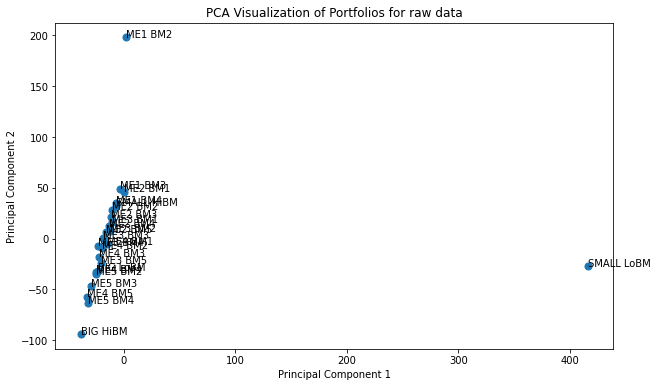

In [27]:
# Load and preprocess the data
data = pd.read_csv("HW6Portfolio25.csv")
data.set_index('Date', inplace=True)

# Perform PCA and retain the first two principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.T)

# Plot the portfolios using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50)
for i, txt in enumerate(data.columns):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]), fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Portfolios for raw data')
plt.show()


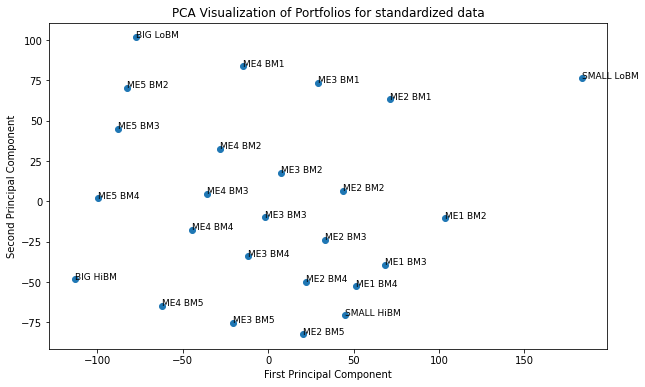

In [28]:

# Load and preprocess the data
data = pd.read_csv("HW6Portfolio25.csv")
data.set_index('Date', inplace=True)

# 1. Standardize the portfolio data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data.T)

# Run PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data)

# Visualize the portfolios using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Visualization of Portfolios for standardized data")

for i, portfolio in enumerate(data.columns):
    plt.annotate(portfolio, (principal_components[i, 0], principal_components[i, 1]), fontsize=9)

plt.show()